# Final Project: An Analysis of Video Game Market
### Project Members:
### Baran Deniz Karahan 23651
### Furkan Canbal 20659

In [1]:
import pandas as pd
import numpy as np
import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg' 
plt.rcParams['figure.figsize'] = 12, 10
df = pd.read_csv("C:\\Users\\Furkan\\Downloads\\proje.csv")


In [2]:
import warnings 
warnings.simplefilter('ignore')

In [3]:
n_rows, n_columns = df.shape
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

# NaN values

In [4]:
df.shape

(16719, 16)

In [5]:
df.isnull().sum()  

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

We look our data for NaN values, which prevents us from apply machine learning techniques.To apply them, we drop the rows with those values.

In [6]:
NaN_ratios = df.isnull().sum() / n_rows 
NaN_ratios

Name               0.000120
Platform           0.000000
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.400981
User_Count         0.546025
Developer          0.396136
Rating             0.404869
dtype: float64

This is the ratio of the NaN values. We can see here that while we are dropping the NaN values, we will lose more than half of our data.

In [7]:
index2drop = df[df["User_Score"]=="tbd"].index
df.drop(index2drop, inplace=True)
df['User_Score'] = df['User_Score'].astype('float64')

Beside NaN values, there are "tbd" values that implicate that it will be added but we can look at this as NaN for out purposes.

In [8]:
df['Year_of_Release'] = df['Year_of_Release'].fillna(0).astype(int)
index2drop = df[df["Year_of_Release"]==0].index
df.drop(index2drop, inplace=True)

In [9]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            31
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       7146
Critic_Count       7146
User_Score         6610
User_Count         6610
Developer          6521
Rating             6631
dtype: int64

# Data Exploration

In [10]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)
platforms_df

,Global_Sales,Number_of_Games
Platform,,
PS2,1171.13,1891
X360,948.91,1149
PS3,920.92,1219
Wii,792.22,858
PS,714.12,1146
DS,655.79,1377
PS4,314.08,387
PSP,273.38,1075
GBA,264.08,553


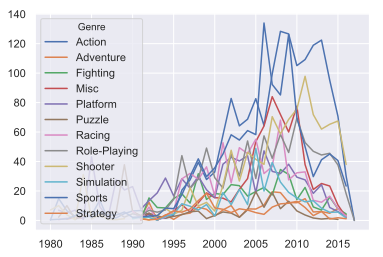

In [11]:
df2 = df.groupby(['Genre','Year_of_Release'])[['Global_Sales']].sum()
plot_df2 = df2.unstack('Genre').loc[:, 'Global_Sales']
plot_df2.index = pd.PeriodIndex(plot_df2.index.tolist(), freq='A')
plot_df2.plot()


This graph shows the sales of each category in relation to time.

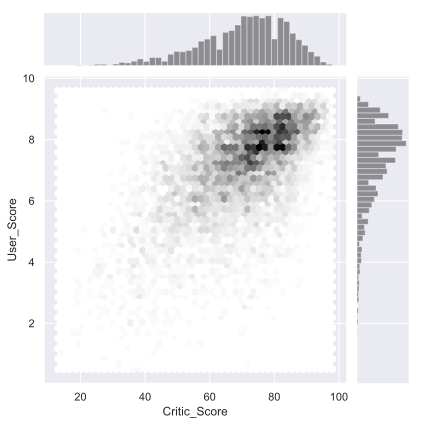

In [12]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='hex',color='black')

This graph shows the relation between player's and critic's scores of each game. We can see there is a strong correlation.

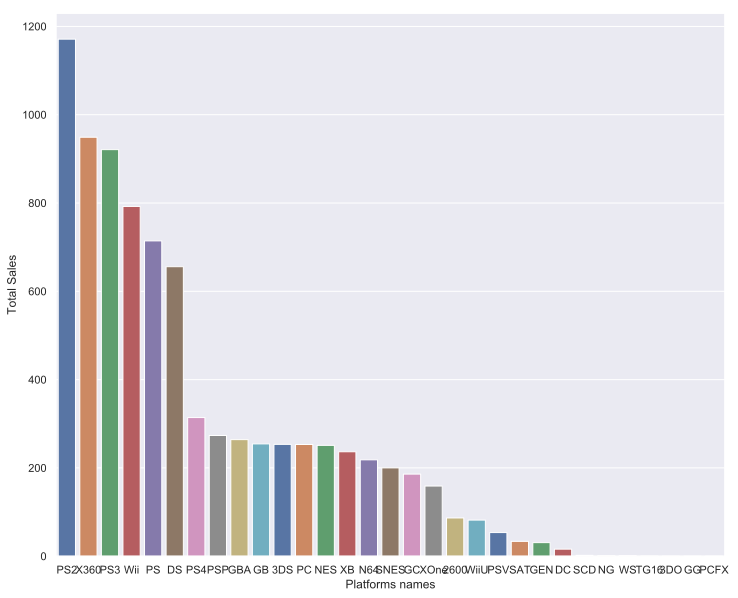

In [13]:
xgraph=platforms_df.index
ygraph=platforms_df.Global_Sales
plt.figure(figsize=(12,10))
sns.barplot(x=xgraph,y=ygraph,palette ='deep')
plt.xlabel("Platforms names")
plt.ylabel("Total Sales")
plt.show()

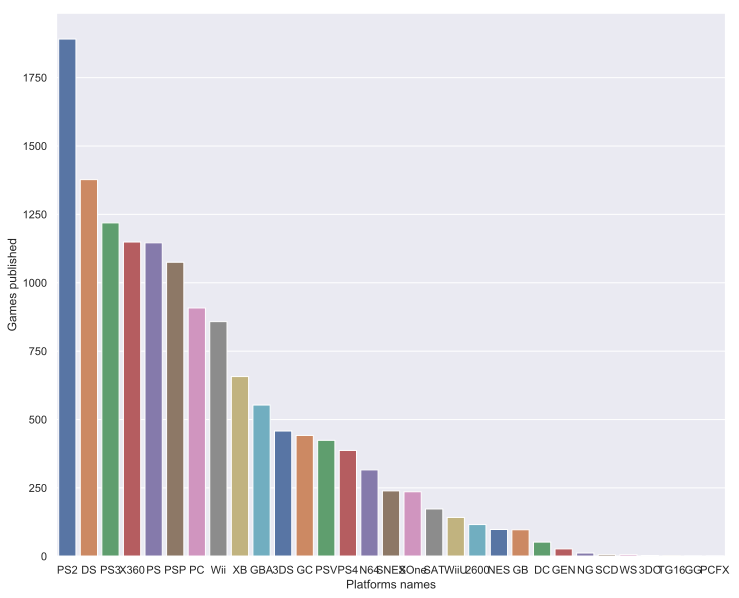

In [14]:
platforms_df.sort_values('Number_of_Games', ascending=False, inplace=True)
xgraph=platforms_df.index
ygraph=platforms_df.Number_of_Games
plt.figure(figsize=(12,10))
sns.barplot(x=xgraph,y=ygraph,palette ='deep')
plt.xlabel("Platforms names")
plt.ylabel("Games published")
plt.show()

# Hypothesis Testing

## Is Sales Related to Genre?

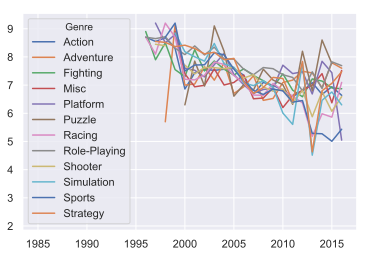

In [15]:
df2 = df.groupby(['Genre','Year_of_Release'])[['User_Score']].mean()
plot_df2 = df2.unstack('Genre').loc[:, 'User_Score']
plot_df2.index = pd.PeriodIndex(plot_df2.index.tolist(), freq='A')
plot_df2.plot()


In [16]:
action_df = df[df["Genre"] == 'Action']["User_Score"]
rest_df = df[(df["Genre"] != 'Action')]["User_Score"]

compare1 = action_df.dropna()
compare2 = rest_df.dropna()
stats.ttest_ind(compare1,compare2,equal_var=False)

Ttest_indResult(statistic=-2.2904032277800566, pvalue=0.022062757876715543)

Thus we reject null hypothesis which means sales are related to the genre of the game.

## Is Platform Related to Sales?

In [17]:
pc=df[df['Platform']=='PC']['Global_Sales']

rest=df[df['Platform'] !='PC']['Global_Sales']

stats.ttest_ind(pc,rest,equal_var=False)

Ttest_indResult(statistic=-12.317537452451724, pvalue=1.5283422665301206e-33)

Thus we reject null hypothesis which means sale is related to the platform.

# Simple Linear Regression 

In [18]:
from sklearn.linear_model import LinearRegression
dfSLR = df[['User_Score','Critic_Score']]
dfSLR = dfSLR.dropna()
X = dfSLR[['User_Score']]
y = dfSLR[['Critic_Score']]
line = LinearRegression().fit(X,y)
m = line.coef_
b = line.intercept_
msg =  'formula: y = {0}x + {1}'.format(m, b)
print(msg)
line_pred = m * X + b

formula: y = [[5.58051859]]x + [30.16593222]


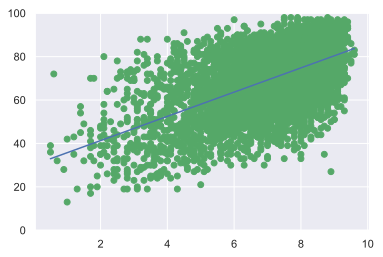

In [19]:
plt.plot(X, y, 'go', X, line_pred)
axes = plt.gca()
axes.set_ylim([0, 100])
plt.show()

In [20]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            31
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       7146
Critic_Count       7146
User_Score         6610
User_Count         6610
Developer          6521
Rating             6631
dtype: int64

In [21]:
df.shape

(14073, 16)

# Machine Learning

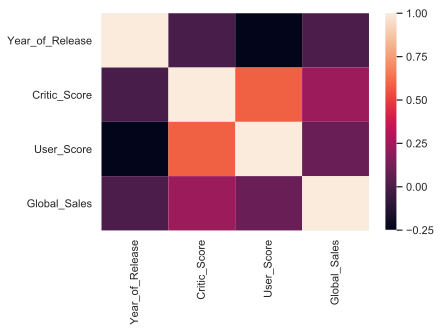

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
lr = linear_model.LinearRegression()
dfLR = df[['Year_of_Release','Critic_Score','User_Score','Global_Sales']]
dfLR = dfLR.dropna()
X = dfLR[['Year_of_Release','Critic_Score','User_Score']]
y = dfLR[['Global_Sales']]
sns.heatmap(dfLR.corr())

In [23]:
from sklearn.model_selection import train_test_split
lr = linear_model.LinearRegression()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

# Multiple Linear Regression

In [26]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][index]))

The coefficient for Year_of_Release is -0.030882934759475147
The coefficient for Critic_Score is 0.5669855440959362
The coefficient for User_Score is -0.15639524862677118


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_train, lr.predict(train_scaled))
mae = mean_absolute_error(y_train, lr.predict(train_scaled))

In [29]:
from math import sqrt
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

mse =  3.8332558112306803  & mae =  0.7774440207083079  & rmse =  1.957870223286181


# Neural Network


In [30]:
from sklearn.neural_network import MLPRegressor  
NN = MLPRegressor()
NN.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
mse2 = mean_squared_error(y_train, NN.predict(train_scaled))
mae2 = mean_absolute_error(y_train, NN.predict(train_scaled))

In [32]:
print("mse = ",mse2," & mae = ",mae2," & rmse = ", sqrt(mse2))

mse =  4.9559402057479565  & mae =  0.9472881210894222  & rmse =  2.2261941078324585


# K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [34]:
mse3 = mean_squared_error(y_train, KNR.predict(train_scaled))
mae3 = mean_absolute_error(y_train, KNR.predict(train_scaled))

In [35]:
print("mse = ",mse3," & mae = ",mae3," & rmse = ", sqrt(mse3))

mse =  2.7575066161378063  & mae =  0.6042890299184044  & rmse =  1.6605741826662868


# Comparing the Methods

In [36]:
print("for Multiple Linear Regression mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse),"\n",
      "           for Neural Network mse = ",mse2,"  & mae = ",mae2,"  & rmse = ", sqrt(mse2),"\n",
      "      for K-Nearest Neighbors mse = ",mse3," & mae = ",mae3," & rmse = ", sqrt(mse3),"\n")

for Multiple Linear Regression mse =  3.8332558112306803  & mae =  0.7774440207083079  & rmse =  1.957870223286181 
            for Neural Network mse =  4.9559402057479565   & mae =  0.9472881210894222   & rmse =  2.2261941078324585 
       for K-Nearest Neighbors mse =  2.7575066161378063  & mae =  0.6042890299184044  & rmse =  1.6605741826662868 



From our findings, we see K-Nearest Neighbors Method have the best accuracy, for our dataset, overall. If we compare our findings from neural network and multiple linear regression methods, multiple linear regression have less aggregate value errors, while having error value change more for each data.  



The most successfull method among we used, K-Nearest Neighbors Method is a simple method. While it is simple, it gives accurate results if there are not too many attributes. In our case we had 3 attributes to predict global sales, which made the result accurate.

Neural Network Method is a method that is used to find complex relations between features. While this sounds more wholesome, in order to achieve accuracy there is a need for very large datasets. We had a dataset of 16 thousand, in which we used further NaN handling and reduced the number. While proving somewhat accurate, in a dataset even bigger, Neural Network Method would show more accuracy.

Multiple Linear Regression Method is a method that focuses on the linear relations. The accuracy of this method increases as attributes are more linearly related and there are less correlation between them. The attributes we used had some correlation (between player's and critic's scores) which might affect our results.